In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
# Specify the path to your file
file_path = '/content/drive/MyDrive/PM_esan/Fire_Source_2012-2023Nov/03_Yearly_ADM_LU/combined_data.csv' # Change 'your_file.csv' to your file's name

# Read the file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

Mounted at /content/drive


<ipython-input-1-38176b3d6473>:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,frp,daynight,Year,TAM_NAM_T,AMPHOE_T,AMPHOE_E,PROV_NAM_T,PROV_NAM_E,LUL1_CODE,LUL2_CODE
0,16.04633,104.05120,312.16,0.42,0.38,2023/02/28,1849,N,VIIRS,n,...,1.25,N,2023,ต.ภูเงิน,อ.เสลภูมิ,Amphoe Sela Phum,ร้อยเอ็ด,Roi Et,A,A2
1,16.01995,104.05153,302.58,0.66,0.73,2023/03/03,1934,N,VIIRS,n,...,1.42,N,2023,ต.ภูเงิน,อ.เสลภูมิ,Amphoe Sela Phum,ร้อยเอ็ด,Roi Et,M,M1
2,16.05333,104.08307,348.88,0.43,0.38,2023/03/10,631,N,VIIRS,n,...,4.51,D,2023,ต.ภูเงิน,อ.เสลภูมิ,Amphoe Sela Phum,ร้อยเอ็ด,Roi Et,A,A2
3,16.02009,104.09893,336.05,0.34,0.56,2023/03/30,657,N,VIIRS,n,...,3.07,D,2023,ต.ภูเงิน,อ.เสลภูมิ,Amphoe Sela Phum,ร้อยเอ็ด,Roi Et,A,A1
4,16.02532,104.09833,356.00,0.34,0.56,2023/03/30,657,N,VIIRS,n,...,3.07,D,2023,ต.ภูเงิน,อ.เสลภูมิ,Amphoe Sela Phum,ร้อยเอ็ด,Roi Et,A,A3


In [2]:
import pandas as pd

# Assuming 'df' is your original DataFrame

# Convert 'acq_date' to datetime if it's not already
df['acq_date'] = pd.to_datetime(df['acq_date'])

# Group by 'acq_date' and count the occurrences (hotspots) for each date
hotspot_counts = df.groupby('acq_date').size().reset_index(name='Hotspot')

# Rename the 'acq_date' column to 'Date'
hotspot_counts.rename(columns={'acq_date': 'Date'}, inplace=True)

# The resulting DataFrame 'hotspot_counts' has columns: 'Date' and 'Hotspot'

In [3]:
hotspot_counts

,Date,Hotspot
0,2012-01-20,1
1,2012-01-21,18
2,2012-01-22,32
3,2012-01-23,81
4,2012-01-24,27
...,...,...
3128,2023-11-29,5
3129,2023-11-30,4
3130,2023-12-01,13
3131,2023-12-02,22


In [15]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'hotspot_counts' is your DataFrame

# Convert 'Date' to a numeric format (e.g., timestamp)
hotspot_counts['Date'] = pd.to_datetime(hotspot_counts['Date']).values.astype(float)
hotspot_counts['Date'] = pd.to_datetime(hotspot_counts['Date'])

# Define your features and target variable
X = hotspot_counts[['Date']]  # Features
y = hotspot_counts['Hotspot']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#X_train, X_test, y_train, and y_test are now your split data

In [19]:
print (X_train)
print (X_test)
print (y_train)
print (y_test)

           Date
0    2012-01-20
1    2012-01-21
2    2012-01-22
3    2012-01-23
4    2012-01-24
...         ...
2501 2021-05-06
2502 2021-05-07
2503 2021-05-08
2504 2021-05-09
2505 2021-05-10

[2506 rows x 1 columns]
           Date
2506 2021-05-11
2507 2021-05-12
2508 2021-05-13
2509 2021-05-14
2510 2021-05-15
...         ...
3128 2023-11-29
3129 2023-11-30
3130 2023-12-01
3131 2023-12-02
3132 2023-12-03

[627 rows x 1 columns]
0        1
1       18
2       32
3       81
4       27
        ..
2501     1
2502    43
2503    17
2504    20
2505     7
Name: Hotspot, Length: 2506, dtype: int64
2506    11
2507    51
2508     8
2509    11
2510     1
        ..
3128     5
3129     4
3130    13
3131    22
3132    26
Name: Hotspot, Length: 627, dtype: int64


In [17]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [23]:
# Convert 'ds' or the datetime column to numeric (e.g., timestamp)
X_test['Date'] = X_test['Date'].values.astype(float)

# Now you can use the regression model to make predictions
y_pred = regr.predict(X_test)

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [-1.67008384e-16]
Mean squared error: 25285.03
Coefficient of determination: -0.21


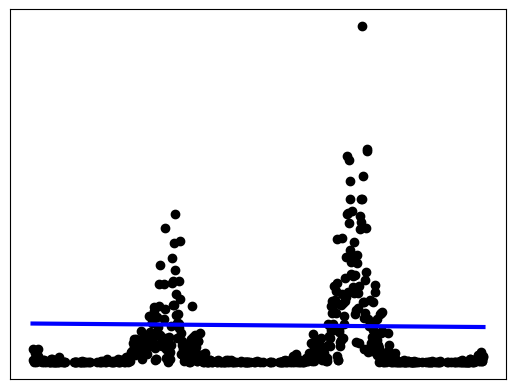

In [26]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()